# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Integración numérica: Métodos del Trapecio y Simpson

### Ejercicio 19.- Calcula aproximaciones de la integral $\displaystyle \int_{0}^{1.5} \sqrt{2+\sin(x^2)}\, dx$ mediante los métodos del Trapecio y Simpson con error absoluto menor que $10^{-4}$,  comparando el número de evaluaciones de la función utilizadas en cada caso.

SOLUCIÓN

### Método de Simpson

En el método de Simpson subdividimos el intervalo $[a,b]$ con los siguientes $2n+1$ nodos equiespaciados: $x_j=a+j\cdot \frac{b-a}{2n}$ para $j=0,1,\dots,2n$.


La fórmula del Método de Simpson aproxima la integral de la siguiente forma:

 $$  \int_a^b f(x) \, dx \ \approx \ {{\rm Simpson}_{ {{\bf n}}}(f)}=  \frac{b-a}{6n}\left(f(a)+4\sum_{k=1}^n f(x_{2k-1})+2\sum_{k=1}^{n-1}f(x_{2k})+f(b)\right) $$ 
 
La cota del error absoluto cometido en el Método de Simpson la podemos dar de la siguiente forma: 

 $$  \left|\int_a^b f(x) \, dx-{\rm Simpson}_{ {{\bf n}}}(f)\right|   \leq  \frac{(b-a)M}{180} \cdot {h^4}, h=\dfrac{b-a}{2n} $$ 
 o bien
 $$  \left|\int_a^b f(x) \, dx-{\rm Simpson}_{ {{\bf n}}}(f)\right|   \leq  \dfrac{(b-a)^5}{180\cdot  (2\cdot n)^4}\cdot M  $$ 
siendo $M>0$ una constante tal que $|f^{(4)}(x)|\leq M$ para todo $x\in [a,b]$. 
siendo $M>0$ una constante tal que $|f^{(4)}(x)|\leq M$ para todo $x\in [a,b]$. 

### Método del Trapecio 

En el método del Trapecio subdividimos el intervalo $[a,b]$ con los siguientes nodos: $x_k=a+k\cdot \frac{b-a}{n}$ para $k=0,1,\dots,n$.

La fórmula del Método del Trapecio nos aproxima la integral de la siguiente forma:
<p>$$\displaystyle \int_a^b  {f(x)} \, dx \ \approx {\rm Trapecio}_{n}(f)=\dfrac{b-a}{2n}\Bigl(f(a)+2f(x_1)+\dots+2f(x_{n-1})+f(b)\Bigr)$$</p>
 
La cota del error absoluto cometido en el Método del Trapecio la podemos dar de la siguiente forma: 

Dada una constante M de forma que $|f''(x)|\leq M$ para todo $x\in [a,b]$. 
$$\displaystyle \left| {\rm Trapecio}_{n}(f)-\int_a^b f(x) \, dx\right| \leq \dfrac{(b-a)^3}{12\cdot n^2}\cdot M $$

Para determinar $M$ calculamos $f''(x)$ y la representamos gráficamente en $[a,b]$:

In [1]:
f(x)=sqrt(2+sin(x^2))#definimos f
show(f)

x |--> sqrt(sin(x^2) + 2)

In [2]:
a=0;b=1.5;#definimos el intervalo

<p>Veamos qué área queremos calcular.</p>

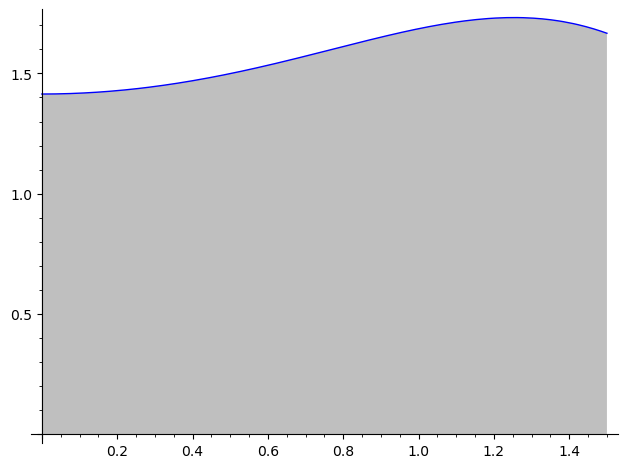

In [3]:
plot(f,x,a,b,fill=true)

Comenzamos con el Método de Simpson:

Buscamos $M>0$ una constante tal que $|f^{(4)}(x)|\leq M$ para todo $x\in [a,b]$.

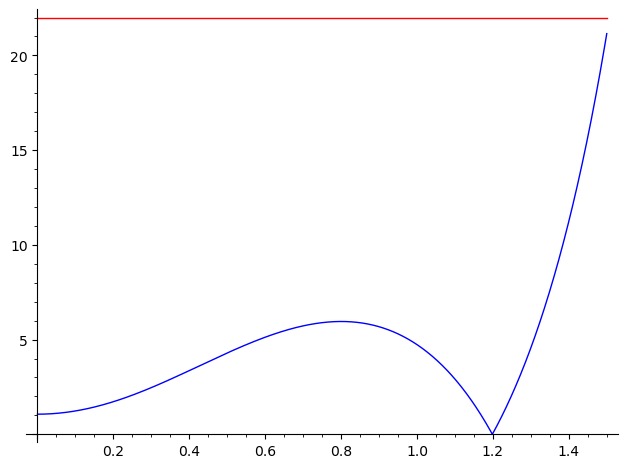

In [4]:
#show(derivative(f(x),x,4))
plot(abs(derivative(f(x),x,4)),(x,a,b))+plot(22,a,b,color='red')

En la gráfica anterior vemos que se puede tomar $M=22$. 


Sabemos que la cota de error viene dada por:
 
$$\left|\int_a^b f(x) \, dx-{\rm Simpson}_{\bf n}(f)\right| \leq \dfrac{(b-a)^5}{180\cdot(2\cdot n)^4}\cdot M$$   para todo $n\in \mathbb{N}$

Para determinar el número $n$ de parábolas que debemos utilizar para alcanzar la precisión deseada, buscamos un $n$ que cumpla

$$\dfrac{(b-a)^5}{180\cdot(2\cdot n)^4}\cdot M \leq \epsilon  \Longleftrightarrow 
\dfrac{1}{n^4} \leq \dfrac{180·2^4·\epsilon}{M·(b-a)^5}  \Longleftrightarrow
n  \geq \sqrt[4]{\dfrac{(b-a)^5}{180\cdot 2^4\cdot \epsilon}\cdot M}=\left(\dfrac{(b-a)^5}{180\cdot 16\cdot \epsilon}\cdot M\right)^{1/4}$$

In [5]:
M=22;
epsilon=10^(-4);

In [6]:
numerical_approx(((b-a)^5/(180*16*epsilon)*M)^(1/4))  #por lo que n=5

4.90762784703538

También podemos utilizar un bucle usando "while" para el cálculo de n:

In [7]:
n=1
while (b-a)^5*M/(180*2^4*n^4)>epsilon:
    n=n+1

In [8]:
n

5

<p>Por tanto, vamos a aplicar el Método de Simpson con $n=5$ parábolas.</p>
<p>Calculamos la aproximación:</p>

In [9]:
X=[a+k*(b-a)/(2*n) for k in [0..2*n]] # Los nodos

<p>Ahora aproximamos la integral por el método de Simpson. Recordemos:</p>
<p>$$ \int_a^b f(x) \, dx \ \approx \  {{\rm Simpson}_{{{\bf n}}}(f)}=\frac{b-a}{6n}\left(f(a)+4\sum_{k=1}^n f(x_{2k-1})+2\sum_{k=1}^{n-1}f(x_{2k})+f(b)\right) $$</p>

In [10]:
simpson=(b-a)/(6*n)*(f(a)+4*sum(f(X[2*k-1]) for k in [1..n])+2*sum(f(X[2*k]) for k in [1..n-1])+f(b))
numerical_approx(simpson)

2.37419946167858

Comparamos con el Método del Trapecio.

Busquemos el $M$. Para eso, calculamos la segunda derivada y la acotamos.

In [11]:
show(derivative(f(x),x,2))

-x^2*cos(x^2)^2/(sin(x^2) + 2)^(3/2) - 2*x^2*sin(x^2)/sqrt(sin(x^2) + 2) + cos(x^2)/sqrt(sin(x^2) + 2)

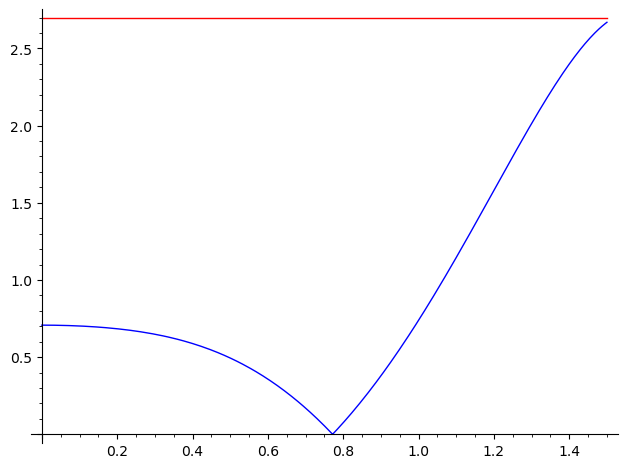

In [12]:
plot(abs(derivative(f(x),x,2)),(x,a,b))+plot(2.7,a,b,color='red')

Tomemos tomar $M=2.7$. 
Para determinar el número $n$ de subintervalos que debemos utilizar para alcanzar la precisión deseada, buscamos un $n$ que cumpla
$$\dfrac{(b-a)^3}{12\cdot n^2}\cdot M  \leq \epsilon  \Longleftrightarrow \dfrac{1}{n^2} \leq  \dfrac{12·\epsilon}{M·(b-a)^3}  \Longleftrightarrow n^2 \geq  \dfrac{M·(b-a)^3}{12·\epsilon}  \Longleftrightarrow n  \geq \sqrt{\dfrac{M·(b-a)^3}{12\cdot \epsilon}}$$

In [13]:
M=2.7;
epsilon=10^(-4);

In [14]:
numerical_approx( sqrt((b-a)^3*M/(12*epsilon))) #=> n=88

87.1421252896669

También se puede hacer iterando hasta encontrar el $n$ adecuado:

In [15]:
n=1
while (b-a)^3*M/(12*n^2)>epsilon:
    n=n+1

In [16]:
n

88

Por tanto, vamos a aplicar el Método del Trapecio con $n=88$ subintervalos.
Calculamos la aproximación:

In [17]:
X=[a+k*(b-a)/n for k in range(0,n+1)]
#show(X) # X's en los que dividimos el intervalo [a,b]

In [18]:
trapecio=(b-a)/(2*n)*(f(a)+2*sum(f(X[k]) for k in range(1,n))+f(b))
numerical_approx( trapecio)

2.37419178758424

Conclusión: Para el método del Trapecio hemos necesitado 88 subintervalos, en cambio en el Método de Simpson hemos necesitado solo 5 parábolas. Es mucho más eficaz en este caso el Método de Simpson.